## Top and Bottom 10% Income Per State

Top and Bottom 10% Income Per State

What are the factor differences between the top and bottom 10% income per state?

Visual aid: Build data frames, Scatter Plot, etc. 

Ideas: Figure if factors such as carpool lanes (commute type)

Consider generating bar charts to display the Top 10% (income based) by State on one, while generating the Bottom 10% on another


In [1]:
# Dependencies and Setup
# Importing our libraries/modules:
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import numpy as np
import os
import requests


## 2015 Census Data

In [2]:
# Reading our dataset 'census_2015.csv' and printing a preview:
al_census_2015 = pd.read_csv('Output/2015_cleaned_state.csv')
al_census_2015.head()

,State,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,OtherTrans,WorkatHome,MeanCommute,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Poverty,ChildPoverty,Unemployment
0,Alabama,4830620,2341093,2489527,193159,3204658,1270556,22007,59324,1089,...,20994,56260,25,1583312,329430,105863,3715,910480,1318475,454437
1,Alaska,733375,384160,349215,47860,457438,23611,98381,42323,8638,...,19750,16083,10,240061,88175,22190,634,74612,99617,61930
2,Arizona,6641928,3299088,3342840,2015055,3751927,263011,265835,193799,11587,...,77252,156279,21,2230882,412325,166404,5502,1210351,1724490,603924
3,Arkansas,2958208,1451913,1506295,203216,2177095,456609,16531,39968,6628,...,15580,40259,22,969630,205337,78614,2406,571519,821223,231142
4,California,38421464,19087135,19334329,14746502,14878698,2157932,144676,5192680,133245,...,437377,917120,24,13403787,2381720,1434085,34099,6260461,8451647,3845611


In [3]:
#print(al_census_2015.columns)

In [4]:
al_2015_narrowed = al_census_2015[['State','TotalPop','Income','Drive','Carpool','Transit','Walk','OtherTrans','WorkatHome','MeanCommute']].copy()
al_2015_narrowed.head()

,State,TotalPop,Income,Drive,Carpool,Transit,Walk,OtherTrans,WorkatHome,MeanCommute
0,Alabama,4830620,37973,1728036,185556,8371,22551,20994,56260,25
1,Alaska,733375,64197,237364,44260,5705,27897,19750,16083,10
2,Arizona,6641928,43252,2151698,310961,59499,58256,77252,156279,21
3,Arkansas,2958208,36626,1036839,135477,5469,21974,15580,40259,22
4,California,38421464,56013,12652510,1861438,905696,468791,437377,917120,24


In [56]:
#sort data set by highest income per capita to find the top 5 
al_2015_narrowed.sort_values('Income',ascending=False,inplace=True)
al_2015_narrowed

,State,TotalPop,Income,Drive,Carpool,Transit,Walk,OtherTrans,WorkatHome,MeanCommute
30,New Jersey,8904413,73014,3076669,347562,474340,131944,79834,172193,29
6,Connecticut,3593222,71184,1395572,146295,86393,53742,20728,78074,25
8,District of Columbia,647484,70848,113843,19255,126342,43578,17566,16890,29
20,Maryland,5930538,69200,2191330,281486,269569,71182,37101,125789,29
21,Massachusetts,6705586,65974,2439985,263391,332952,164149,59452,155745,24
40,Rhode Island,1053661,65783,414023,44117,15129,19149,7735,17938,23
11,Hawaii,1406299,64879,437127,91790,41706,29378,23086,30227,21
1,Alaska,733375,64197,237364,44260,5705,27897,19750,16083,10
29,New Hampshire,1324201,60648,566713,55612,6080,19999,8662,42085,24
7,Delaware,926454,58067,351669,36442,13252,9435,4878,18130,25


In [6]:
#Create a new df with only the states with the top 5 income for 2015
al_top_15 = al_2015_narrowed.loc[(al_2015_narrowed['Income']>65900)].copy()
al_top_15.sort_values('Income',ascending=False,inplace=True)
al_top_15

,State,TotalPop,Income,Drive,Carpool,Transit,Walk,OtherTrans,WorkatHome,MeanCommute
30,New Jersey,8904413,73014,3076669,347562,474340,131944,79834,172193,29
6,Connecticut,3593222,71184,1395572,146295,86393,53742,20728,78074,25
8,District of Columbia,647484,70848,113843,19255,126342,43578,17566,16890,29
20,Maryland,5930538,69200,2191330,281486,269569,71182,37101,125789,29
21,Massachusetts,6705586,65974,2439985,263391,332952,164149,59452,155745,24


In [7]:
#sort data set by lowest income per capita to find the bottom 5 
al_2015_narrowed.sort_values('Income',ascending=True,inplace=True)
al_2015_narrowed.head(5)

,State,TotalPop,Income,Drive,Carpool,Transit,Walk,OtherTrans,WorkatHome,MeanCommute
39,Puerto Rico,3583073,17920,862080,95002,26602,35673,21151,22786,28
24,Mississippi,2988081,34938,1016167,120309,4812,18119,17595,26588,25
3,Arkansas,2958208,36626,1036839,135477,5469,21974,15580,40259,22
0,Alabama,4830620,37973,1728036,185556,8371,22551,20994,56260,25
17,Kentucky,4397353,39137,1559706,183746,20731,43747,23983,58945,24


In [30]:
#Create a new df with only the states with the bottom 5 income per capita
al_bottom_15 = al_2015_narrowed.loc[(al_2015_narrowed['Income']<39130)].copy()
al_bottom_15.sort_values('Income',ascending=True,inplace=True)
al_bottom_15

,State,TotalPop,Income,Drive,Carpool,Transit,Walk,OtherTrans,WorkatHome,MeanCommute
39,Puerto Rico,3583073,17920,862080,95002,26602,35673,21151,22786,28
24,Mississippi,2988081,34938,1016167,120309,4812,18119,17595,26588,25
3,Arkansas,2958208,36626,1036839,135477,5469,21974,15580,40259,22
0,Alabama,4830620,37973,1728036,185556,8371,22551,20994,56260,25


## 2017 Census Data

In [31]:
# Reading our dataset 'census_2017.csv' and printing a preview:
al_census_2017 = pd.read_csv('Output/2017_cleaned_state.csv')
#al_census_2017.head()

In [44]:
al_2017_narrowed = al_census_2017[['State','TotalPop','Income','Drive','Carpool','Transit','Walk','OtherTrans','WorkatHome','MeanCommute']].copy()
al_2017_narrowed.head()

,State,TotalPop,Income,Drive,Carpool,Transit,Walk,OtherTrans,WorkatHome,MeanCommute
0,Alabama,4850771,40271,1764923,175915,7460,22876,20721,63042,25
1,Alaska,738565,66425,241406,43817,5298,28776,18812,15742,10
2,Arizona,6809946,45816,2263175,320998,58689,57731,76986,173850,21
3,Arkansas,2977944,39025,1058709,134256,4661,22357,15631,41029,22
4,California,38982847,61046,13241749,1874326,937544,479743,458329,998319,25


In [55]:
#sort data set by highest income per capita to find the top 5 
al_2017_narrowed.sort_values('Income',ascending=False,inplace=True)
al_2017_narrowed.head()

,State,TotalPop,Income,Drive,Carpool,Transit,Walk,OtherTrans,WorkatHome,MeanCommute
8,District of Columbia,672391,77649,121618,19315,126626,47216,22177,20388,30
30,New Jersey,8960161,77047,3135880,351039,503890,131190,80206,184626,30
6,Connecticut,3594478,74496,1411177,146212,88236,52207,20688,86689,25
20,Maryland,5996079,72541,2243191,278498,267495,72360,42012,137344,30
21,Massachusetts,6789319,71030,2491063,263997,359298,171056,69538,172130,24


In [34]:
#sort data set by lowest income per capita to find the bottom 5 
al_2017_narrowed.sort_values('Income',ascending=True,inplace=True)
al_2017_narrowed.head(5)

,State,TotalPop,Income,Drive,Carpool,Transit,Walk,OtherTrans,WorkatHome,MeanCommute
39,Puerto Rico,3468963,18412,853996,88003,22222,33165,19996,22650,27
24,Mississippi,2986220,37018,1039239,115025,4120,17366,19903,25954,25
3,Arkansas,2977944,39025,1058709,134256,4661,22357,15631,41029,22
0,Alabama,4850771,40271,1764923,175915,7460,22876,20721,63042,25
31,New Mexico,2084828,41197,704621,86121,9677,18808,17425,42153,19


In [47]:
#Create a new df with only the states with the top 5 income per capita in 2017
al_top_17 = al_2017_narrowed.loc[(al_2017_narrowed['Income']>=71029)].copy()
al_top_17.sort_values('Income',ascending=False,inplace=True)
al_top_17


,State,TotalPop,Income,Drive,Carpool,Transit,Walk,OtherTrans,WorkatHome,MeanCommute
8,District of Columbia,672391,77649,121618,19315,126626,47216,22177,20388,30
30,New Jersey,8960161,77047,3135880,351039,503890,131190,80206,184626,30
6,Connecticut,3594478,74496,1411177,146212,88236,52207,20688,86689,25
20,Maryland,5996079,72541,2243191,278498,267495,72360,42012,137344,30
21,Massachusetts,6789319,71030,2491063,263997,359298,171056,69538,172130,24


In [48]:
#Create a new df with only the states with the bottom 5 income per capita for 2017
al_bottom_17 = al_2017_narrowed.loc[(al_2017_narrowed['Income']<=41197)].copy()
al_bottom_17.sort_values('Income',ascending=True,inplace=True)
al_bottom_17.head()

,State,TotalPop,Income,Drive,Carpool,Transit,Walk,OtherTrans,WorkatHome,MeanCommute
39,Puerto Rico,3468963,18412,853996,88003,22222,33165,19996,22650,27
24,Mississippi,2986220,37018,1039239,115025,4120,17366,19903,25954,25
3,Arkansas,2977944,39025,1058709,134256,4661,22357,15631,41029,22
0,Alabama,4850771,40271,1764923,175915,7460,22876,20721,63042,25
31,New Mexico,2084828,41197,704621,86121,9677,18808,17425,42153,19


## Compare 2015 & 2017

The scatter plots below compare all 50 states by income per capita and mean commute time. 

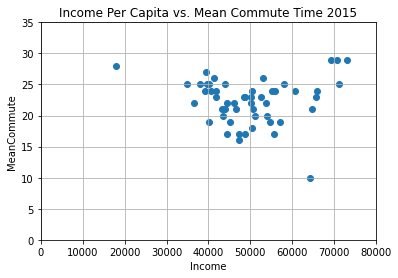

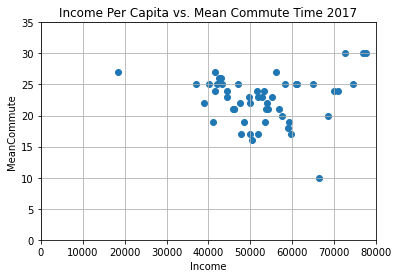

In [76]:
#create a scatter plot to see if commute time has any correlation to income per cap
plt.scatter(al_census_2015["Income"],al_census_2015["MeanCommute"])
plt.xlabel('Income')
plt.ylabel('MeanCommute')
plt.title(f'Income Per Capita vs. Mean Commute Time 2015')
plt.grid(True)
# set axes range
plt.xlim(0, 80000)
plt.ylim(0, 35)
plt.show()


#create a scatter plot to see if commute time has any correlation to income per cap
plt.scatter(al_census_2017["Income"],al_census_2017["MeanCommute"])
plt.xlabel('Income')
plt.ylabel('MeanCommute')
plt.title(f'Income Per Capita vs. Mean Commute Time 2017')
plt.grid(True)
plt.xlim(0, 80000)
plt.ylim(0, 35)
plt.show()

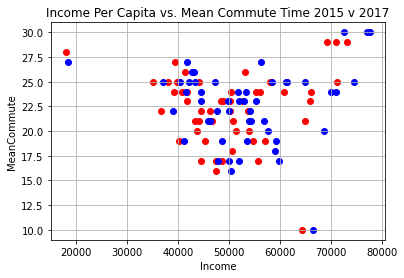

In [90]:
#create a scatter plot to see if commute time has any correlation to income per cap
plt.scatter(al_census_2015["Income"],al_census_2015["MeanCommute"], color = 'r')
plt.scatter(al_census_2017["Income"],al_census_2017["MeanCommute"], color = 'b')
plt.xlabel('Income')
plt.ylabel('MeanCommute')
plt.title(f'Income Per Capita vs. Mean Commute Time 2015 v 2017')
plt.grid(True)
#add legend to plot to show names of colors 

In [50]:
#Combine the states with the top 5 ICP's for 2015 & 2017

top_comb = pd.merge(al_top_15, al_top_17, how='outer', on='State')
top_comb_rn = top_comb.rename(columns={'TotalPop_x':'TotalPop_2015','Income_x':'Income_2015',
                            'Drive_x':'Drive_2015','Carpool_x':'Carpool_2015','Transit_x':'Transit_2015','Walk_x':'Walk_2015',
                            'OtherTrans_x':'OtherTrans_2015','WorkatHome_x':'WorkatHome_2015','MeanCommute_x':'MeanCommute_2015',
                            'TotalPop_y':'TotalPop_2017', 'Income_y':'Income_2017', 
                            'Drive_y':'Drive_2017','Carpool_y':'Carpool_2017', 'Transit_y':'Transit_2017', 'Walk_y':'Walk_2017',
                            'OtherTrans_y':'OtherTrans_2017', 'WorkatHome_y':'WorkatHome_2017','MeanCommute_y':'MeanCommute_2017'})
top_comb_rn

,State,TotalPop_2015,Income_2015,Drive_2015,Carpool_2015,Transit_2015,Walk_2015,OtherTrans_2015,WorkatHome_2015,MeanCommute_2015,TotalPop_2017,Income_2017,Drive_2017,Carpool_2017,Transit_2017,Walk_2017,OtherTrans_2017,WorkatHome_2017,MeanCommute_2017
0,New Jersey,8904413,73014,3076669,347562,474340,131944,79834,172193,29,8960161,77047,3135880,351039,503890,131190,80206,184626,30
1,Connecticut,3593222,71184,1395572,146295,86393,53742,20728,78074,25,3594478,74496,1411177,146212,88236,52207,20688,86689,25
2,District of Columbia,647484,70848,113843,19255,126342,43578,17566,16890,29,672391,77649,121618,19315,126626,47216,22177,20388,30
3,Maryland,5930538,69200,2191330,281486,269569,71182,37101,125789,29,5996079,72541,2243191,278498,267495,72360,42012,137344,30
4,Massachusetts,6705586,65974,2439985,263391,332952,164149,59452,155745,24,6789319,71030,2491063,263997,359298,171056,69538,172130,24


In [51]:
bot_comb = pd.merge(al_bottom_15, al_bottom_17, how='outer', on='State')
bot_comb_rn = bot_comb.rename(columns={'TotalPop_x':'TotalPop_2015','Income_x':'Income_2015',
                            'Drive_x':'Drive_2015','Carpool_x':'Carpool_2015','Transit_x':'Transit_2015','Walk_x':'Walk_2015',
                            'OtherTrans_x':'OtherTrans_2015','WorkatHome_x':'WorkatHome_2015','MeanCommute_x':'MeanCommute_2015',
                            'TotalPop_y':'TotalPop_2017', 'Income_y':'Income_2017', 
                            'Drive_y':'Drive_2017','Carpool_y':'Carpool_2017', 'Transit_y':'Transit_2017', 'Walk_y':'Walk_2017',
                            'OtherTrans_y':'OtherTrans_2017', 'WorkatHome_y':'WorkatHome_2017','MeanCommute_y':'MeanCommute_2017'})
bot_comb_rn

,State,TotalPop_2015,Income_2015,Drive_2015,Carpool_2015,Transit_2015,Walk_2015,OtherTrans_2015,WorkatHome_2015,MeanCommute_2015,TotalPop_2017,Income_2017,Drive_2017,Carpool_2017,Transit_2017,Walk_2017,OtherTrans_2017,WorkatHome_2017,MeanCommute_2017
0,Puerto Rico,3583073.0,17920.0,862080.0,95002.0,26602.0,35673.0,21151.0,22786.0,28.0,3468963,18412,853996,88003,22222,33165,19996,22650,27
1,Mississippi,2988081.0,34938.0,1016167.0,120309.0,4812.0,18119.0,17595.0,26588.0,25.0,2986220,37018,1039239,115025,4120,17366,19903,25954,25
2,Arkansas,2958208.0,36626.0,1036839.0,135477.0,5469.0,21974.0,15580.0,40259.0,22.0,2977944,39025,1058709,134256,4661,22357,15631,41029,22
3,Alabama,4830620.0,37973.0,1728036.0,185556.0,8371.0,22551.0,20994.0,56260.0,25.0,4850771,40271,1764923,175915,7460,22876,20721,63042,25
4,New Mexico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2084828,41197,704621,86121,9677,18808,17425,42153,19


## Stacked Bar Chart to Display 
## Commute Type for Top States 2015 & 2017

<ipython-input-84-4b162ba6d49a>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


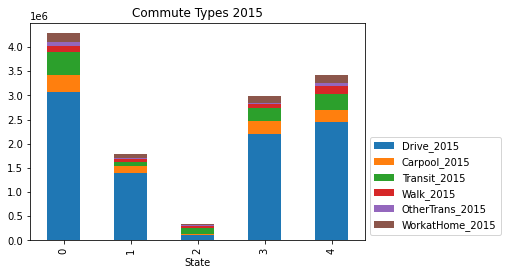

In [84]:
#make a stacked bar chart of top state in 2015 using the commute types
top_comb_rn[["Drive_2015", "Carpool_2015", "Transit_2015",'Walk_2015','OtherTrans_2015','WorkatHome_2015']].plot(kind="bar", stacked=True)
plt.title("Commute Types 2015")
plt.xlabel("State")

ax = plt.subplot()
ax.legend(loc='best', bbox_to_anchor=(1, 0.5))

#need to set tick labels for top 2015 states

<ipython-input-82-302b1ff52698>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


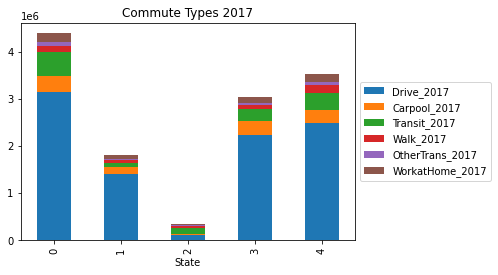

In [82]:
#make a stacked bar chart of top state in 2015 using the commute types
top_comb_rn[["Drive_2017", "Carpool_2017", "Transit_2017",'Walk_2017','OtherTrans_2017','WorkatHome_2017']].plot(kind="bar", stacked=True)
plt.title("Commute Types 2017")
plt.xlabel("State")

ax = plt.subplot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#set tick labels for top 2017 states